# Load libraries

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Data Exploration and Data Cleaning

In [51]:
df = pd.read_csv('prices.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [52]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [54]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [55]:
df.shape

(851264, 7)

In [56]:
df['symbol'].nunique()

501

# Data selection

In [57]:
df1=df[df['symbol']=='AMZN']
df1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [58]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07


In [59]:
np.round(df1.median(),2)

open          282.50
close         282.92
low           279.87
high          285.07
volume    3890700.00
dtype: float64

In [60]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04
Maximum date value : 2016-12-30


Text(0.5, 1.0, 'AMAZON Stock value changes since 2010')

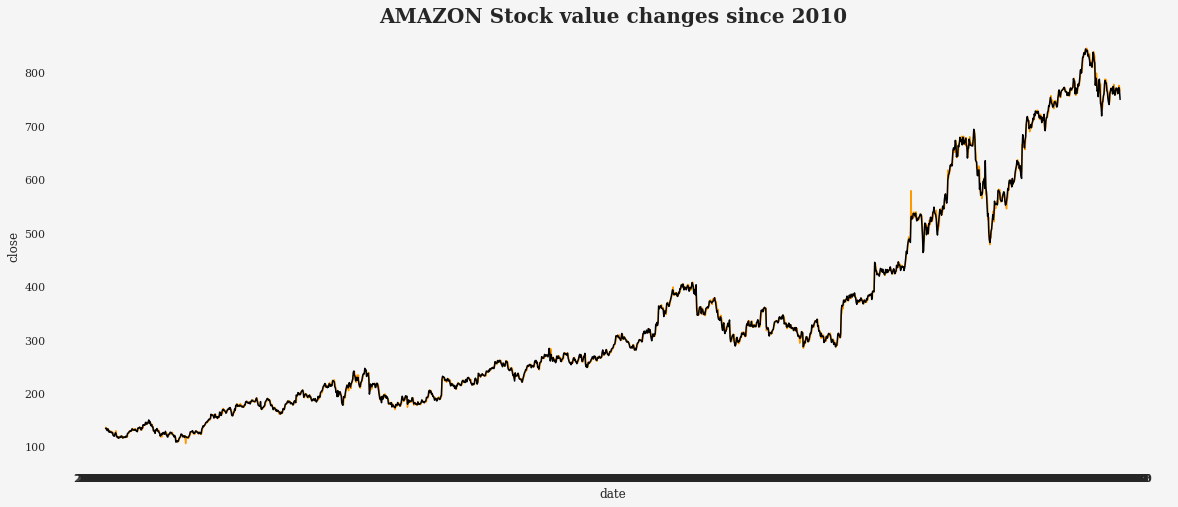

In [62]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open')
ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AMAZON Stock value changes since 2010", size=20, weight='bold')

In [64]:
df.skew()

open       6.656860
close      6.653729
low        6.660703
high       6.648877
volume    13.132746
dtype: float64

In [65]:
df.kurtosis()

open       66.330697
close      66.276033
low        66.419441
high       66.166598
volume    326.067488
dtype: float64

In [66]:
df.corr()

,open,close,low,high,volume
open,1.000000,0.999849,0.999916,0.999930,-0.059950
close,0.999849,1.000000,0.999928,0.999927,-0.060154
low,0.999916,0.999928,1.000000,0.999892,-0.060760
high,0.999930,0.999927,0.999892,1.000000,-0.059452
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000


<AxesSubplot:>

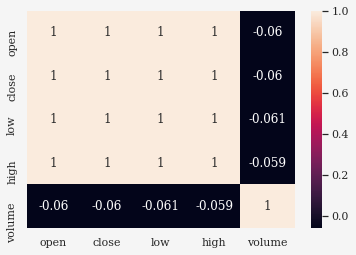

In [67]:
sns.heatmap(df.corr(), annot=True)

In [68]:
df.drop_duplicates(inplace=True)

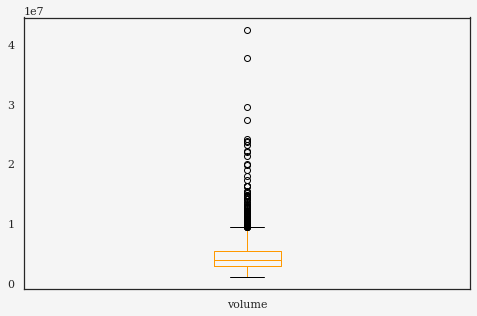

In [69]:
df1['volume'].plot.box(figsize=(8, 5));

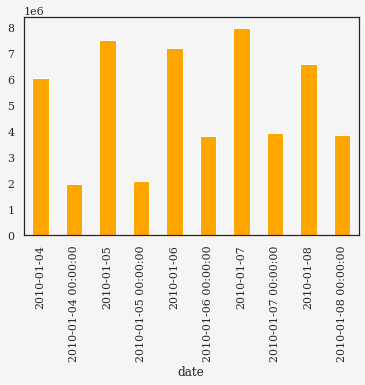

In [70]:
df_avg_rate = df.groupby('date')['volume'].mean()
df_avg_rate[:10].plot.bar(color='orange');

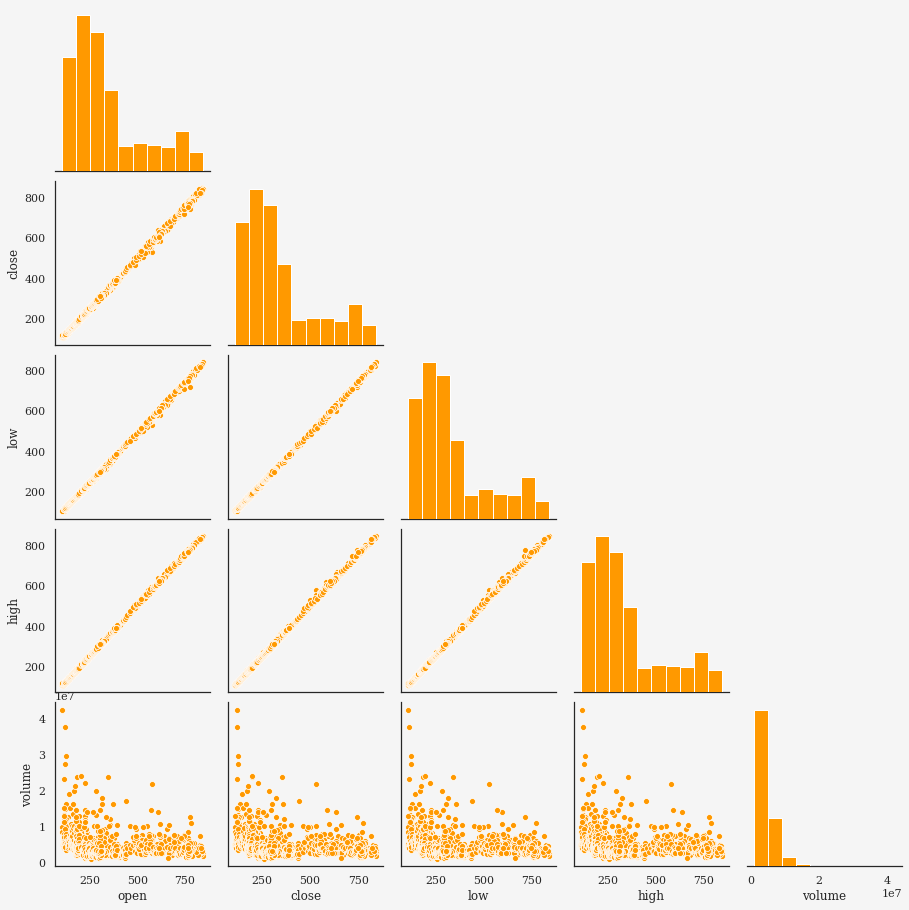

In [71]:
sns.pairplot(df1,corner=True)

In [72]:
df1.corr()['close']

open      0.999581
close     1.000000
low       0.999832
high      0.999811
volume   -0.238560
Name: close, dtype: float64

In [73]:
from scipy.stats import levene, shapiro
int_cols=df1.select_dtypes(exclude='object').columns.to_list()

for i in int_cols:
    _, p_value=shapiro(df1[i])
    if p_value<0.05:
        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))
        
    print("Normalitiy test p_value for featue -  {} is {}".format(i,np.round(p_value,3)))

Feature open is normaly distributed
Normalitiy test p_value for featue -  open is 0.0
Feature close is normaly distributed
Normalitiy test p_value for featue -  close is 0.0
Feature low is normaly distributed
Normalitiy test p_value for featue -  low is 0.0
Feature high is normaly distributed
Normalitiy test p_value for featue -  high is 0.0
Feature volume is normaly distributed
Normalitiy test p_value for featue -  volume is 0.0


<AxesSubplot:>

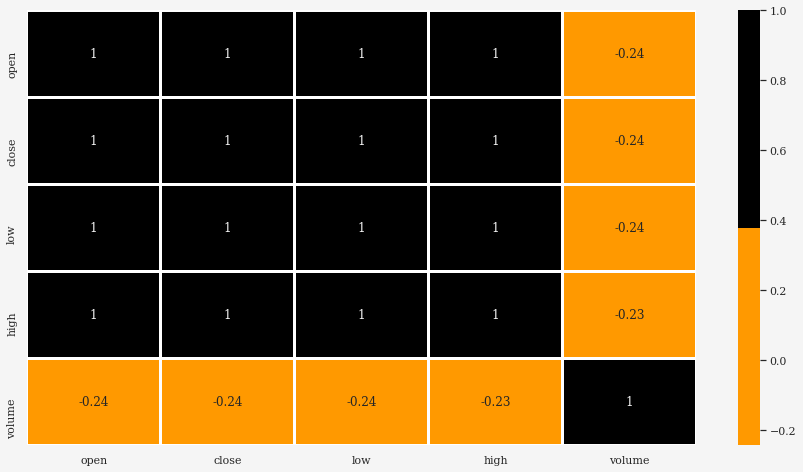

In [74]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

In [83]:
X=df1[['volume','open']]
y=df1['close']

# Data Split 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# Model building and Model evaluation 

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

Text(800000, 540, 'Mean Absolute error : 66.39')

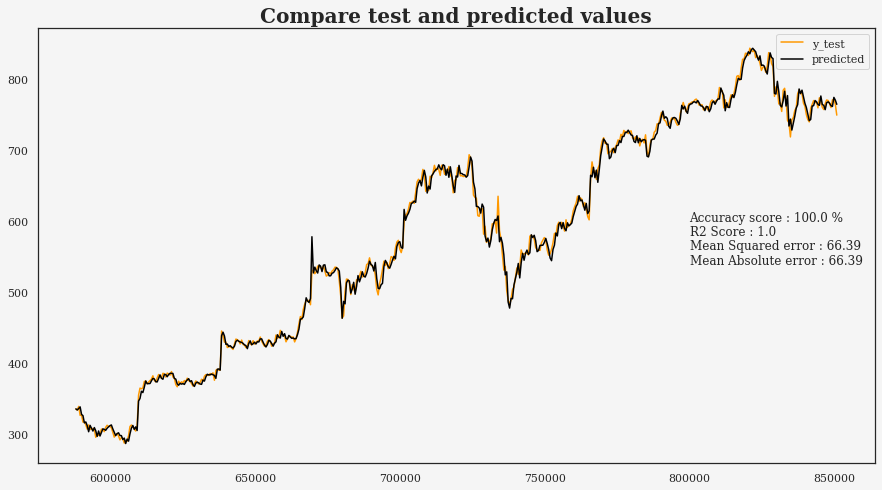

In [79]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))
plt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))